## Does synchronization hold after a graph is specialized?

** Part I **

Investigating synchronization with dynamics on nodes governed by F(x) = x^2 - x

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import networkx as nx


### Functions

In [2]:
def F(x):
    #Internal dynamics of each node
    return x**2 - x

In [3]:
def G(x):
    #External dynamics of each node
    #(Nothing)
    return x

In [4]:
def iterate(x0,f,iters=100):
    """
    Returns n length orbit of x0 under f
    Params
    ------
    x0 : scalar or ndarray
    f : function
    n : positive integer
    Returns
    -------
    orbit : ndarray- orbit of x0 under f
    """
    orbit = [x0]
    x = x0
    for i in range(iters):
        x = f(x)
        orbit.append(x)
    return np.array(orbit)

In [5]:
def getGraphDynam(F,G,A,d=.2):
    """
    Computes the orbit of x under the following equation:
    x_i[k+1] = F(x_i[k])+d*SUM_j{ A_ij*[G(x_i[k])-G(x_j[k])] }
         for j = 1,2, ... n
     Parameters
     ----------
     F (function): Internal dynamics of nodes
     G (function): How nodes affect eachother
     A (nxn ndarray): Adjacency Matrix
     d (float): dampening parameter
     
     Returns
     -------
     GraphDynam (function) : dynamics on graph as described above
    """
    deg = A.sum(axis=0)
    L = np.diag(deg) - A

    def GraphDynam(x):
        return F(x) + d*np.dot(L,G(x))
    
    return GraphDynam

In [6]:
def plotAllOrb(orb,k=0):
    #Plots every orbit
    m,n = orb.shape
    
    if k == 0:
        iteraxis = np.arange(m)
    if k < 0:
        iteraxis = np.arange(m+k,m)
    if k > 0:
        iteraxis = np.arange(k,m)
        
    
    plt.rcParams['figure.figsize'] = (10,5)
    for i in range(n):
        plt.plot(iteraxis,orb[k:,i],label="Node "+str(i+1))
    plt.xlabel("Iteration")
    plt.ylabel("Node Values")
    plt.legend()
    plt.show()
    print("Node variance in last iteration: {}".format(np.var(orb[-1])))

In [27]:
def plotRandomOrbits(orb,k=0):
    #Plots ten random orbits
    m,n = orb.shape
    
    if k == 0:
        iteraxis = np.arange(m)
    if k < 0:
        iteraxis = np.arange(m+k,m)
    if k > 0:
        iteraxis = np.arange(k,m)
        
    nodes = np.random.choice(range(n),size=10,replace=False)
    plt.rcParams['figure.figsize'] = (10,5)
    for n in nodes:
        plt.plot(iteraxis,orb[k:,n],label="Node "+str(n+1))
    
    plt.xlabel("Iteration")
    plt.ylabel("Node Values")
    plt.legend()
    plt.show()
    print("Variance in last orbit: {}".format(np.var(orb[-1])))

We'll look at what happens when we iterate the function on several values from the interval [-1,1]

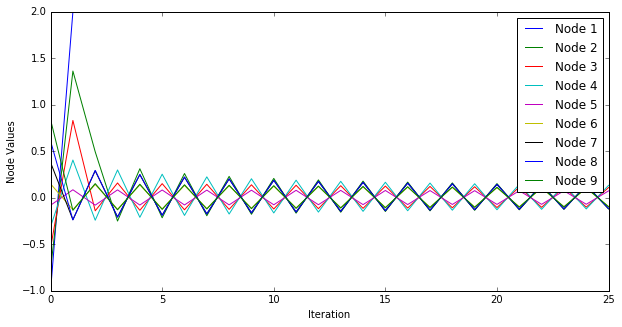

Node variance in last iteration: 0.416019806626


In [196]:
x0 = np.arange(-1,1,.23)
plotAllOrb(iterate(x0,F,iters=25))

## Intro


### Feedback Network

This is the network we discussed in our meeting. You can see a picture of it as well as the dynamics it exhibits.

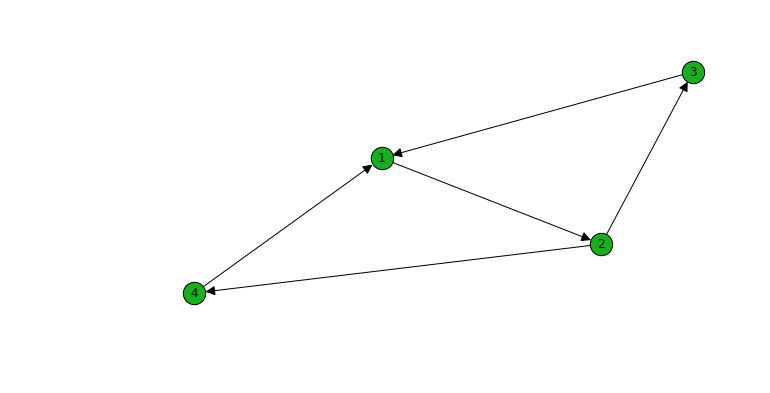

In [182]:
A = np.array([
    [0,0,1,1],
    [1,0,0,0],
    [0,1,0,0],
    [0,1,0,0]
])


Gr = nx.from_numpy_matrix(A.T,create_using=nx.DiGraph())
labels = {0:'1',1:'2',2:'3',3:'4'}
options = {
    'node_color': '#15b01a',
    'node_size': 500,
    'width': 1,
    'arrowsize': 20,
    'with_labels':True,
    'labels':labels,
    'arrows':True
}
nx.draw(Gr,**options)
plt.show()


** Dynamics on the network **

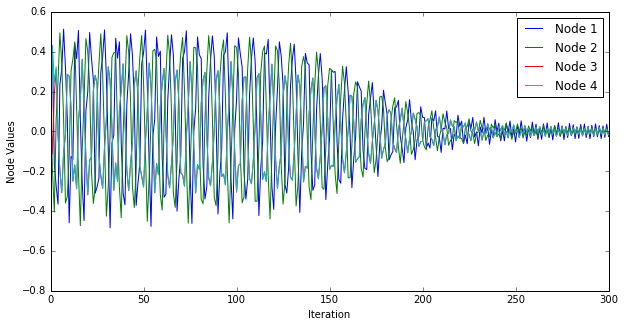

Node variance in last iteration: 1.4677234594e-05


In [186]:
#Initial Conditions on nodes
m,n = A.shape
#x = np.random.rand(n)*2-1
x = np.array([ 0.35901014,  0.13229686,  0.15762601, -0.63225068])
GraphDyn = getGraphDynam(F,G,A,d=.784643)
orbit = iterate(x,GraphDyn,iters=300)
plotAllOrb(orbit)

It looks like a chimera. We will look at the end of the orbit to see.

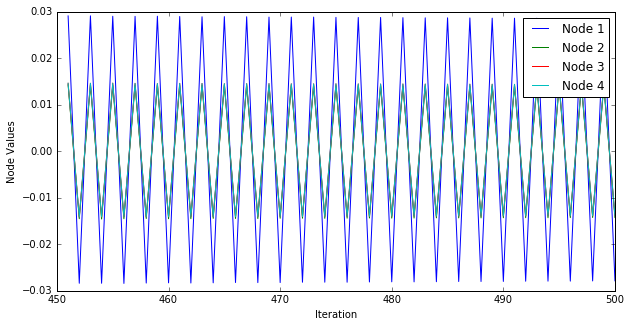

Node variance in last iteration: 3.61083690926e-05


In [187]:
#Initial Conditions on nodes
m,n = A.shape
#x = np.random.rand(n)*2-1

GraphDyn = getGraphDynam(F,G,A,d=.784643)
orbit = iterate(x,GraphDyn,iters=500)
plotAllOrb(orbit,-50)

In [188]:
#Last four iterations
orbit[-6:,:]

array([[ 0.02856959,  0.01398268,  0.01439077,  0.01439077],
       [-0.02791967, -0.01426127, -0.01386347, -0.01386347],
       [ 0.02854796,  0.01399162,  0.0143678 ,  0.0143678 ],
       [-0.0278802 , -0.01423896, -0.0138662 , -0.0138662 ],
       [ 0.02854153,  0.01397271,  0.01435095,  0.01435095],
       [-0.02785275, -0.0142452 , -0.01384822, -0.01384822]])

We see that node 1, the first column, is not close to the other three nodes. Node 3 nad node 4 are very similar in value, and node 2 follows them closely but not perfectly.

For lower values of d, the network formed the above synchronization structure very quickly. Though I continued to increase d, the network always stabilized to the chimera exhibited above.

### Specialized Feeback Network

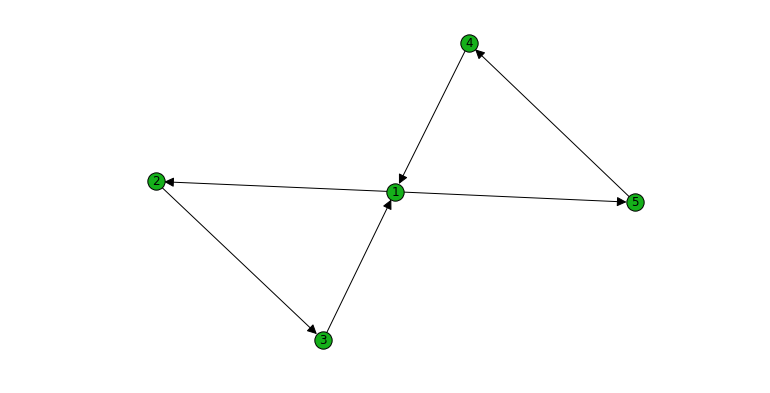

In [11]:
sA = np.array([
    [0,0,1,1,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,0,0,1],
    [1,0,0,0,0]
])

sGr = nx.from_numpy_matrix(sA.T,create_using=nx.DiGraph())
labels = {0:'1',1:'2',2:'3',3:'4',4:'5'}
options = {
    'arrows':True,
    'arrowsize':20,
    'node_color':'#15b01a',
    'labels':labels
}
nx.draw(sGr,**options)
plt.show()

Low d-values

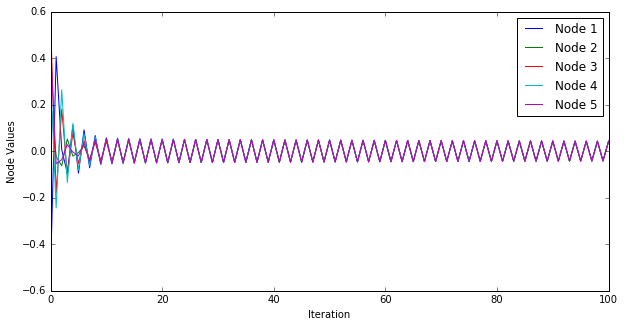

Node variance in last iteration: 1.00296079314e-21

Last four iterations:
[[-0.04172626 -0.04172626 -0.04172626 -0.04172626 -0.04172626]
 [ 0.04346734  0.04346734  0.04346734  0.04346734  0.04346734]
 [-0.04157793 -0.04157793 -0.04157793 -0.04157793 -0.04157793]
 [ 0.04330666  0.04330666  0.04330666  0.04330666  0.04330666]]


In [198]:
#Random initialization
m,n = sA.shape
x = np.random.rand(n)*2-1
GraphDyn = getGraphDynam(F,G,sA,d=0.2)
orbit = iterate(x,GraphDyn,iters=100)
plotAllOrb(orbit)
print("\nLast four iterations:")
print(orbit[-4:,:])

High d-values

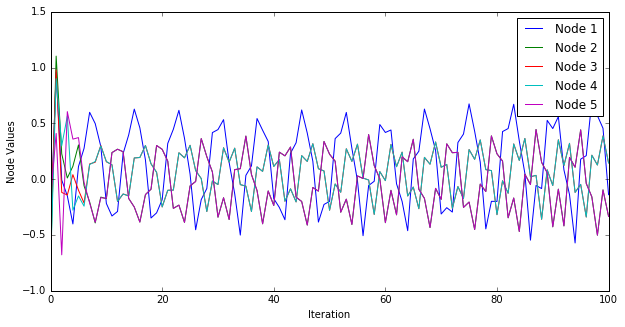

Node variance in last iteration: 0.0461961166485

Last four iterations:
[[ 0.70552355 -0.15798556  0.21532963  0.21532963 -0.15798556]
 [ 0.56954043 -0.5016882   0.12702017  0.12702017 -0.5016882 ]
 [ 0.45654024 -0.09594436  0.38758539  0.38758539 -0.09594436]
 [-0.13876953 -0.33288774  0.14600361  0.14600361 -0.33288774]]


In [197]:
#Specific Initialization
m,n = sA.shape
#x = np.random.rand(n)*2-1
strange = np.array([-0.43949292, -0.77124676, -0.51153516, -0.78003735, -0.16571637])
GraphDyn = getGraphDynam(F,G,sA,d=0.79285)
orbit = iterate(strange,GraphDyn,iters=100)
plotAllOrb(orbit)
print("\nLast four iterations:")
print(orbit[-4:,:])

This graph has a chimera at the very highest possible d values. Nodes 2 and 5 synchronize and nodes 3 and 4 synchronize. It makes sense because of the symmetry in the graph, but it looks very strange. The d value is right on the brink of destabilization. Most starting values diverge at this point.

### Other networks

For the following networks, we will look at synchronization and the effect of specialization

** Plotting Function **

In [28]:
def netwDyn(A,d=.2,k=0,x0=None,iters=100):
    """
    Plot node dynamics using the functions above
    """
    m,n = A.shape
    labels = {}
    for i in range(n):
        labels[i]=str(i+1)
    gr = nx.from_numpy_matrix(A.T,create_using=nx.DiGraph())
    nx.draw(gr,arrows=True,node_color='#15b01a',labels=labels)
    plt.show()
    
    if x0 is None:
        x0 = np.random.rand(n)*2-1

    GraphDyn = getGraphDynam(F,G,A,d=d)
    orbit = iterate(x0,GraphDyn,iters=iters)
    
    if n > 13:
        plotRandomOrbits(orbit,k=k)
    else:
        plotAllOrb(orbit,k=k)
    
    print("\nLast four iterations:")
    print(orbit[-4:,:])
    
    return x0
    

### Chain
I'm including this as a sort of control. We don't expect this to synchronize

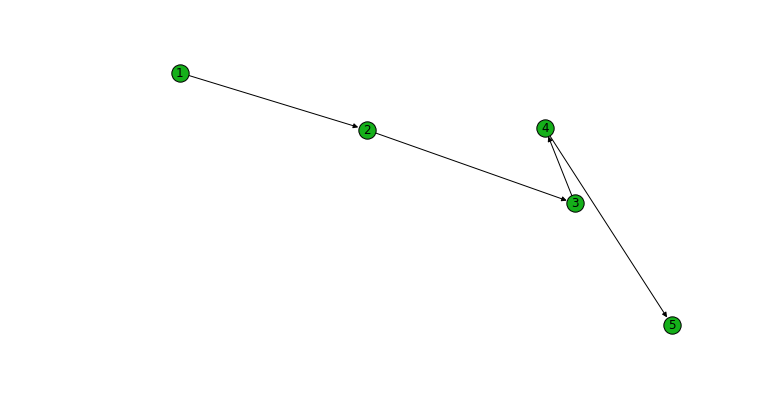

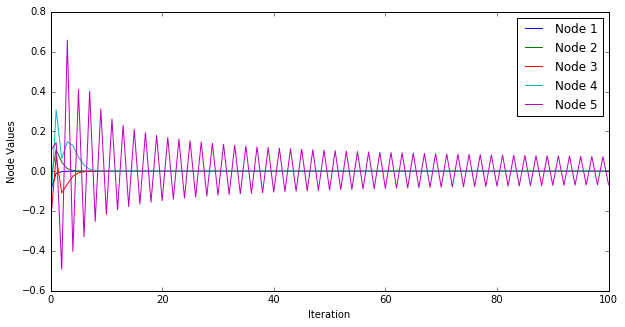

Node variance in last iteration: 0.000732320400571

Last four iterations:
[[-7.43196955e-70  4.48423130e-67 -1.33453879e-64  2.61312541e-62
   7.37523146e-02]
 [-1.48639391e-70  9.05764624e-68 -2.72288836e-65  5.38639548e-63
  -6.83129107e-02]
 [-2.97278782e-71  1.82936598e-68 -5.55446847e-66  1.10995376e-63
   7.29795644e-02]
 [-5.94557564e-72  3.69440541e-69 -1.13284609e-66  2.28656113e-64
  -6.76535476e-02]]


In [14]:
A = np.array([
    [0,0,0,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0]
])
x = np.array([-0.0971442 , -0.05211871, -0.25684694, -0.1966308 ,  0.10297466])
x0 = netwDyn(A,d=1.2,x0=x)

No synchronization. By increasing the d value, I caused the first four nodes to converge to zero faster, but they did not synchronize as d increased. We probably need feedback to get synchronization. This is about as high as d can go. Unfortunately, this graph can't really be specialized because there is only one path through each node.

### Triangle
This is another type of control. We expect that it will synchronize.

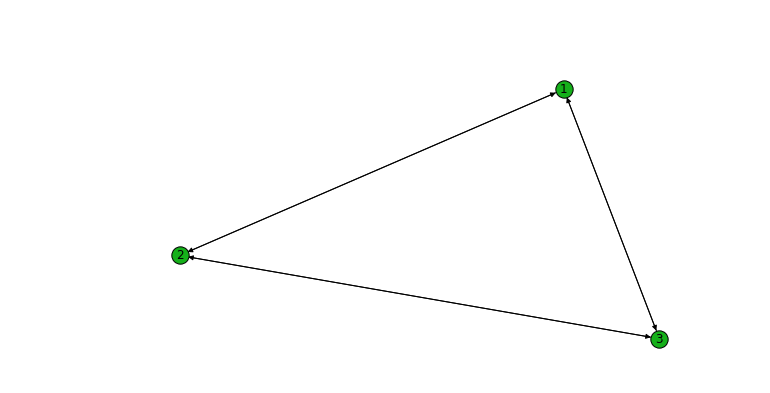

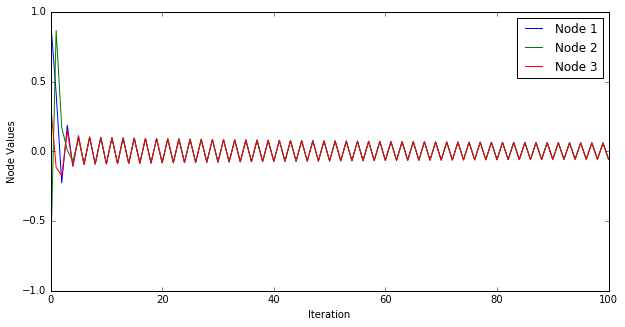

Node variance in last iteration: 0.0

Last four iterations:
[[ 0.06044101  0.06044101  0.06044101]
 [-0.0567879  -0.0567879  -0.0567879 ]
 [ 0.06001276  0.06001276  0.06001276]
 [-0.05641123 -0.05641123 -0.05641123]]


array([ 0.9437925 , -0.80161334,  0.34299607])

In [195]:
A = np.array([[0,1,1],
              [1,0,1],
              [1,1,0]])

netwDyn(A,iters=100)

### Star

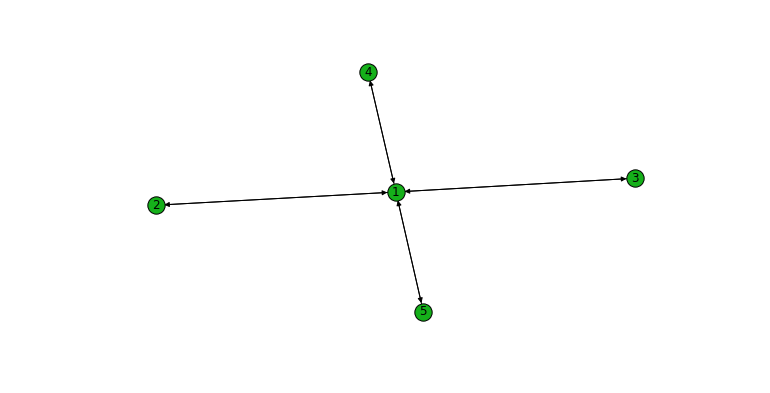

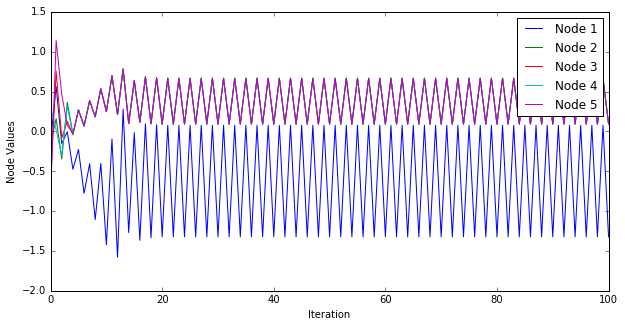

Node variance in last iteration: 0.319994107314

Last four iterations:
[[ 0.0755739   0.66672179  0.66672179  0.66672179  0.66672179]
 [-1.32309601  0.09110453  0.09110453  0.09110453  0.09110453]
 [ 0.0755739   0.66672179  0.66672179  0.66672179  0.66672179]
 [-1.32309601  0.09110453  0.09110453  0.09110453  0.09110453]]


In [15]:
nNodes = 5
A = np.zeros((nNodes,nNodes))
A[0,:] = np.ones(nNodes)
A[:,0] = np.ones(nNodes)

x = np.array([-0.12528123, -0.15031729, -0.62787999,  0.31038766, -0.8267249 ])
x0 = netwDyn(A,d=.53,x0=x)

At the highest d values and for specific starting points nodes 2-5 syncrhonize and node 1 exhibits different behavior.

### Specialized Star
Specializing the above graph with nodes 2-5 as the base gives

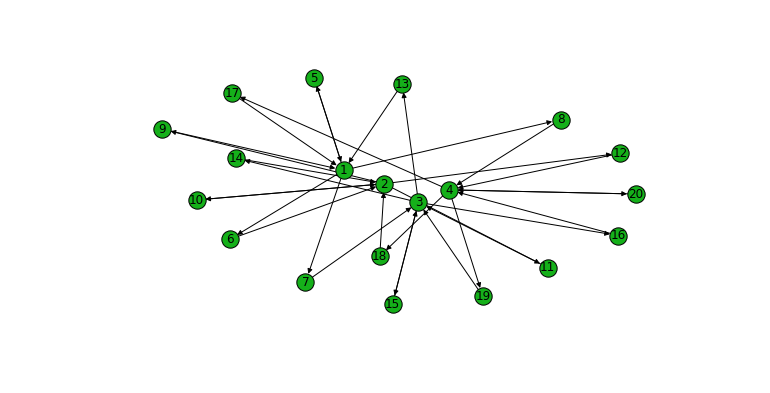

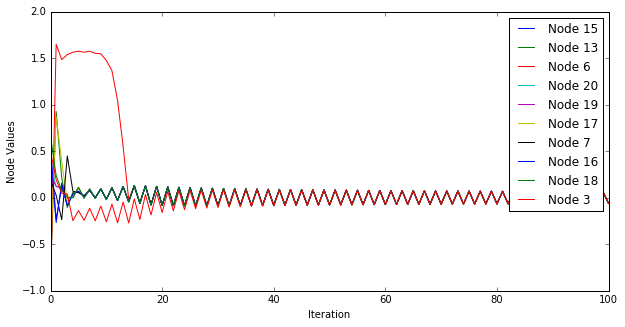

Variance in last orbit: 3.34915064225e-11

Last four iterations:
[[ 0.06530215  0.06530215  0.06530215  0.06530215  0.06531908  0.06531908
   0.06531908  0.06531908  0.06531908  0.06531908  0.06531908  0.06531908
   0.06531908  0.06531908  0.06531908  0.06531908  0.06531908  0.06531908
   0.06531908  0.06531908]
 [-0.06106365 -0.06106365 -0.06106365 -0.06106365 -0.06104603 -0.06104603
  -0.06104603 -0.06104603 -0.06104603 -0.06104603 -0.06104603 -0.06104603
  -0.06104603 -0.06104603 -0.06104603 -0.06104603 -0.06104603 -0.06104603
  -0.06104603 -0.06104603]
 [ 0.06476548  0.06476548  0.06476548  0.06476548  0.06477938  0.06477938
   0.06477938  0.06477938  0.06477938  0.06477938  0.06477938  0.06477938
   0.06477938  0.06477938  0.06477938  0.06477938  0.06477938  0.06477938
   0.06477938  0.06477938]
 [-0.06059217 -0.06059217 -0.06059217 -0.06059217 -0.0605777  -0.0605777
  -0.0605777  -0.0605777  -0.0605777  -0.0605777  -0.0605777  -0.0605777
  -0.0605777  -0.0605777  -0.0605777  -0.0

array([-0.28109176, -0.83938906,  0.49581743, -0.56269502, -0.82748673,
       -0.97125144,  0.18602615, -0.02259237,  0.49471422,  0.53158414,
       -0.05502729,  0.33475224, -0.79265849,  0.65964662,  0.44651569,
        0.53604243, -0.55807934,  0.65687269,  0.24147233,  0.35181051])

In [127]:
z = np.zeros((20,4))
Z = np.zeros((16,16))
I = np.eye(4)
Irow = np.hstack((np.hstack((I,I)),np.hstack((I,I))))
A = np.hstack((z,np.vstack((Irow,Z))))
for j in range(4):
    A[4+4*j:8+4*j,j] = np.ones(4)

x = np.array([-0.28109176, -0.83938906,  0.49581743, -0.56269502, -0.82748673,
       -0.97125144,  0.18602615, -0.02259237,  0.49471422,  0.53158414,
       -0.05502729,  0.33475224, -0.79265849,  0.65964662,  0.44651569,
        0.53604243, -0.55807934,  0.65687269,  0.24147233,  0.35181051])
xp = x + np.random.rand(20)/5 -.1
netwDyn(A,d=.3822,x0=x)

I tried to get something cool, but all this network does is synchronize.

### Triangle with Tail

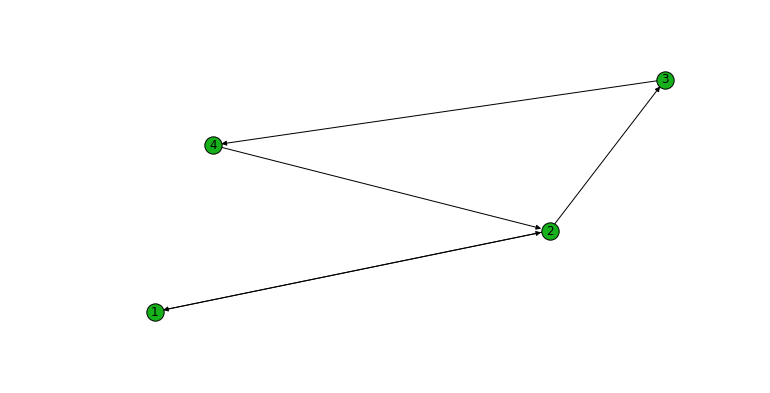

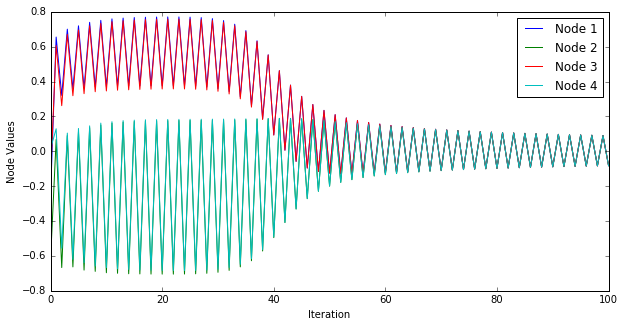

Node variance in last iteration: 3.4336131348e-11

Last four iterations:
[[ 0.09208013  0.09206457  0.09208013  0.09206458]
 [-0.08358691 -0.08360316 -0.08358691 -0.08360316]
 [ 0.09058879  0.09057754  0.09058879  0.09057754]
 [-0.082372   -0.08238372 -0.082372   -0.08238371]]


In [46]:
A = np.array([
    [0,1,0,0],
    [1,0,0,1],
    [0,1,0,0],
    [0,0,1,0]
])
x = np.array([-0.24763934, -0.61991745, -0.13973458,  0.01492809])

x0 = netwDyn(A,d=.930007,x0=x)

This is the wildest behavior I can get out of this graph. It synchronizes on it's d boundary.
<br><br><br>

### Specialized Triangle with Tail:

Specializing the triangle over nodes 1,3 and 4 gives:

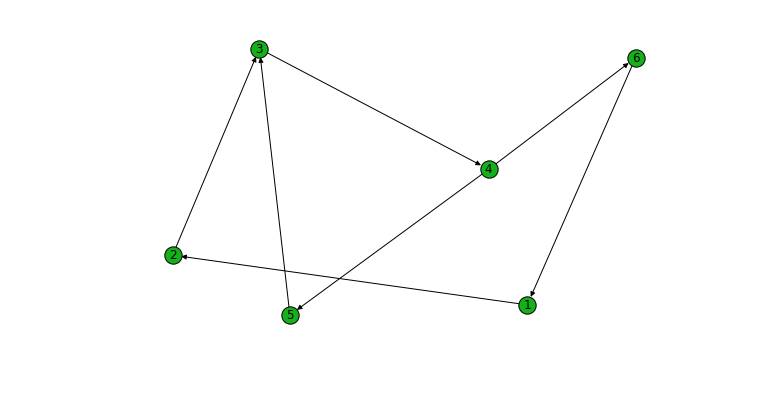

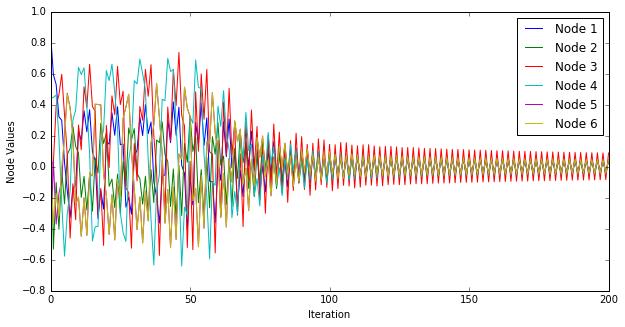

Node variance in last iteration: 0.000282557238779

Last four iterations:
[[-0.04407302 -0.04185426 -0.08374226 -0.04543729 -0.04066635 -0.04066635]
 [ 0.04324508  0.04541038  0.08976156  0.04170169  0.04619992  0.04619992]
 [-0.04377788 -0.04158741 -0.08320786 -0.04513325 -0.04040744 -0.04040744]
 [ 0.04295347  0.04509826  0.08914496  0.04143003  0.04588333  0.04588333]]


In [117]:
A = np.array([
    [0,0,0,0,0,1],
    [1,0,0,0,0,0],
    [0,1,0,0,1,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0]

])
x = np.array([ 0.86065114,  0.51404154,  0.02922608,  0.44118807, -0.54556709,
       -0.01802958])
x0 = netwDyn(A,d=.81322,iters=200,x0=x)

We have syncronization in nodes 1,2,4-6 and node 3 doing it's own thing. I think this is because node three experiences a delay as signals travel through node four, then down two paths of different lengths back to node three. I think the difference in path length contributes to this behavior.

The above behavior is exhibited for all values of d. It is also robust to starting point. In other words, this is the only type of behavior I could get from the network.

### Two Triangles
Note that this is not strongly connected

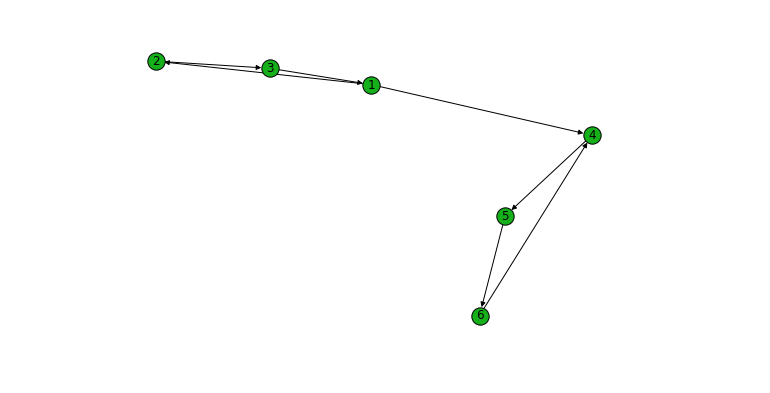

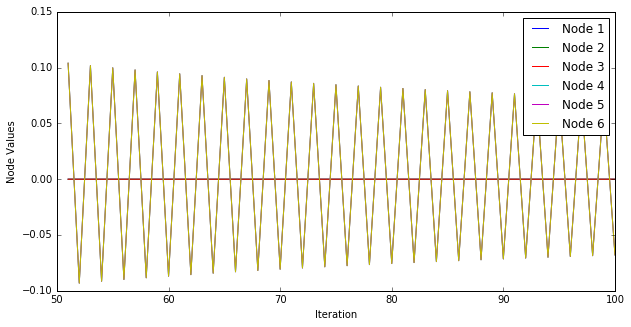

Node variance in last iteration: 0.0011517756774

Last four iterations:
[[ 4.11375615e-10  5.44956665e-10  7.21913880e-10  7.40208061e-02
   7.40208059e-02  7.40208057e-02]
 [-3.40789470e-10 -4.51449930e-10 -5.98043829e-10 -6.85417264e-02
  -6.85417263e-02 -6.85417262e-02]
 [ 2.82314893e-10  3.73987608e-10  4.95428100e-10  7.32396947e-02
   7.32396946e-02  7.32396945e-02]
 [-2.33873713e-10 -3.09816707e-10 -4.10419756e-10 -6.78756419e-02
  -6.78756418e-02 -6.78756417e-02]]


In [133]:
A = A = np.array([
    [0,0,1,0,0,0],
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [1,0,0,0,0,1],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0]

])
x = np.array([-0.71528768,  0.57822159, -0.38510879,  0.0835569 , -0.12221341,
       -0.42378981])
x0 = netwDyn(A,d=.7,k=-50,iters=100,x0=x)

Nodes 4,5 and 6 synchronize, but Nodes 1-3 do not and converge to zero.

### Two Triangles Specialized
Specializing with nodes 1-3 and 5-6 as a base gives:

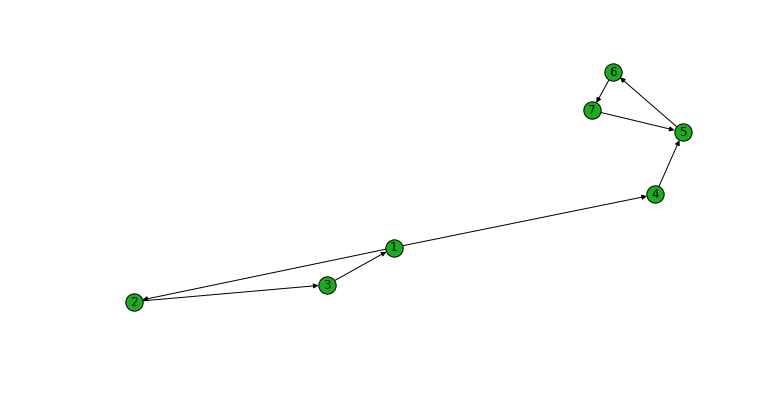

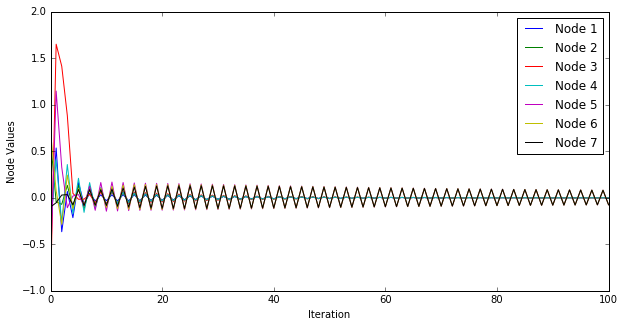

Node variance in last iteration: 0.00136468341952

Last four iterations:
[[ 0.00053792  0.0007127   0.00094424  0.0007127   0.08321118  0.08295023
   0.08265545]
 [-0.00051131 -0.00067724 -0.00089704 -0.00067724 -0.07631848 -0.07612168
  -0.07588248]
 [ 0.00048646  0.00064451  0.00085389  0.00064451  0.08219123  0.08195555
   0.08168847]
 [-0.00046241 -0.00061248 -0.00081128 -0.00061248 -0.07546419 -0.07528597
  -0.07506888]]


array([-0.35390392,  0.61336014, -0.99078326, -0.3052964 , -0.7076779 ,
        0.70967793, -0.09901577])

In [135]:
A = np.array([
    [0,0,1,0,0,0,0],
    [1,0,0,0,0,0,0],
    [0,1,0,0,0,0,0],
    [1,0,0,0,0,0,0],
    [0,0,0,1,0,0,1],
    [0,0,0,0,1,0,0],
    [0,0,0,0,0,1,0]

])

netwDyn(A)

### Network From Paper

Example from specialization paper

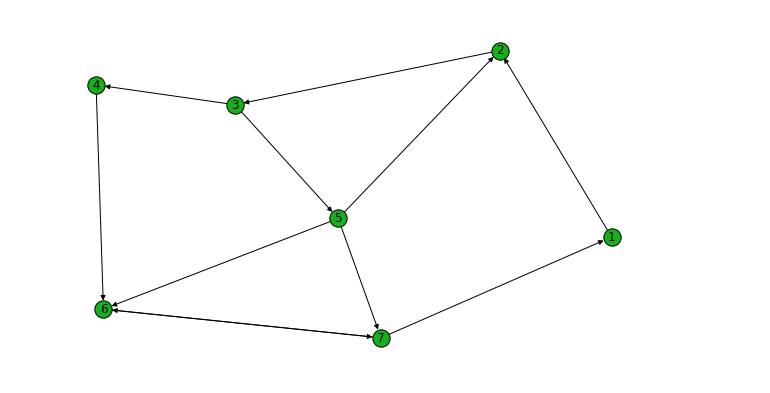

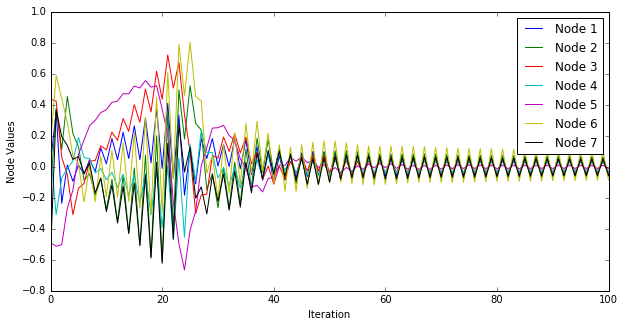

Node variance in last iteration: 0.000513441905068

Last four iterations:
[[ 0.05724057  0.0659713   0.03257899  0.03329753  0.01043276  0.10375191
   0.05020918]
 [-0.04938349 -0.06272788 -0.03204744 -0.03172071 -0.01115823 -0.08659514
  -0.05665628]
 [ 0.05656008  0.06523849  0.03218394  0.03293976  0.01035295  0.10252368
   0.04973018]
 [-0.0489117  -0.06207331 -0.03171529 -0.03136236 -0.01097871 -0.08582329
  -0.05599712]]


array([ 0.02845915, -0.15434774,  0.43710607,  0.09966227, -0.48980802,
        0.15023338, -0.56074484])

In [155]:
A = np.array([
    [0,0,0,0,0,0,1],
    [1,0,0,0,1,0,0],
    [0,1,0,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0],
    [0,0,0,1,1,0,1],
    [0,0,0,0,1,1,0]

])
x = np.array([ 0.02845915, -0.15434774,  0.43710607,  0.09966227, -0.48980802,
        0.15023338, -0.56074484])
netwDyn(A,d=.65145,x0=x,iters=100)

Nodes 3 and 4 synchronize

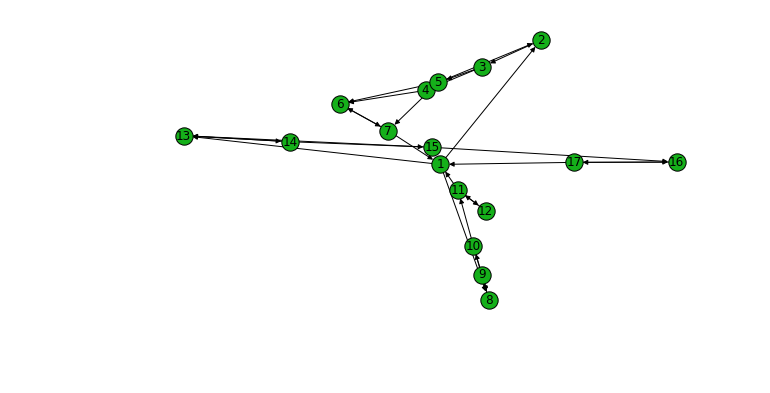

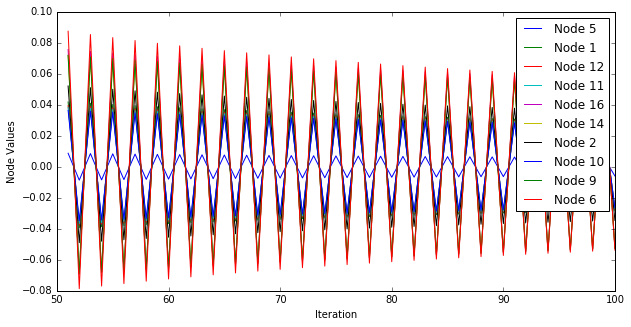

Variance in last orbit: 0.000646724939579

Last four iterations:
[[ 0.02979878  0.03650462  0.01817847  0.01861026  0.00607596  0.0583818
   0.03194042  0.11385933  0.05462624  0.02753348  0.02832916  0.02874539
   0.11385238  0.05462265  0.02753144  0.0569198   0.02800402]
 [-0.02857399 -0.03498307 -0.01789232 -0.01813438 -0.00602422 -0.05444682
  -0.0310933  -0.10032514 -0.05302427 -0.02664317 -0.02741278 -0.02779422
  -0.10032016 -0.05302114 -0.02664139 -0.05326463 -0.02749332]
 [ 0.02947369  0.03609143  0.01797198  0.01839062  0.00600641  0.0576528
   0.03154543  0.11276516  0.05411882  0.02727441  0.02804779  0.02845231
   0.1127592   0.05411575  0.02727266  0.05636278  0.0277326 ]
 [-0.02827642 -0.03460544 -0.01769323 -0.01792681 -0.00595616 -0.05381585
  -0.03072082 -0.09947971 -0.05254823 -0.02640152 -0.02715045 -0.02752142
  -0.09947543 -0.05254555 -0.02639999 -0.05277876 -0.02723278]]


array([-0.18599242,  0.04986844,  0.82033016, -0.52941828, -0.84918675,
        0.561024  , -0.93716901,  0.67131711,  0.65481649, -0.90039793,
       -0.50535021, -0.50121304,  0.1968458 , -0.10584856,  0.13650518,
        0.23904351, -0.42381305])

In [165]:
comp = np.array([
    [0,1,1,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,1],
    [0,0,0,1,0]
])
As = la.block_diag(A,comp,comp)
As[7,0] = 1
As[12,0] = 1
As[0,10] = 1
As[0,-1] = 1

netwDyn(As,d=.3,k=-50)

The nodes synchronize in groups, as shown below:

Nodes 0,6,9,10,11,14,16


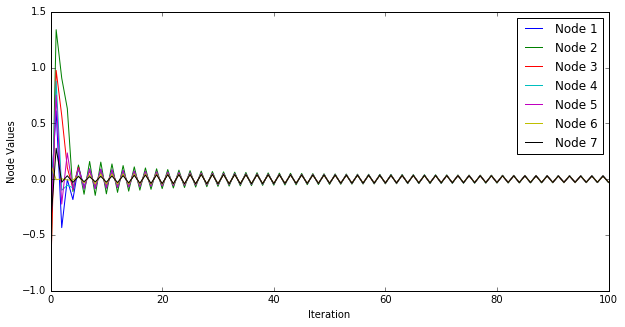

Node variance in last iteration: 1.91147932002e-06

Nodes 5,8,13,15


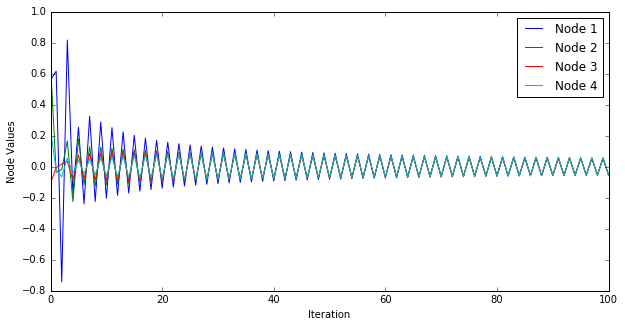

Node variance in last iteration: 2.75227461232e-07

Nodes 2,3


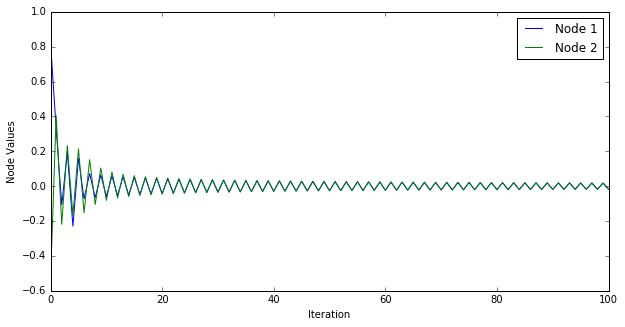

Node variance in last iteration: 1.36404724218e-08

Nodes 7,12


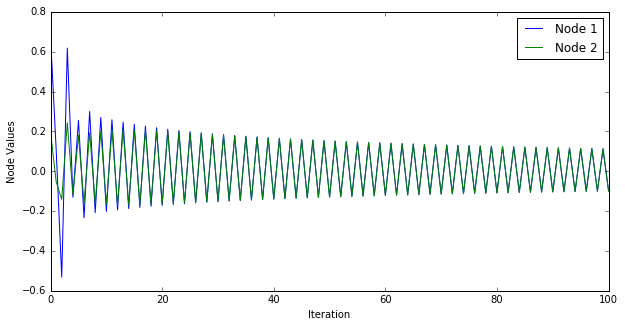

Node variance in last iteration: 4.5626945646e-12

Nodes 1,4,6


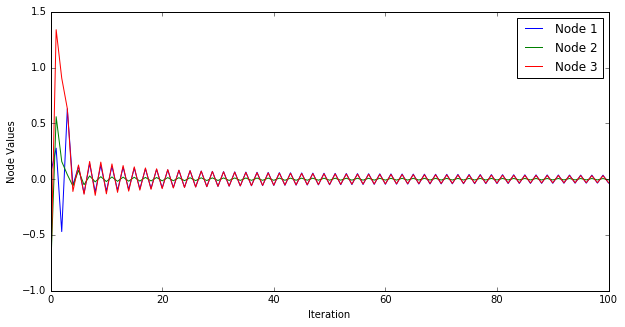

Node variance in last iteration: 0.000161017764657


In [180]:
x = np.array([-0.18599242,  0.04986844,  0.82033016, -0.52941828, -0.84918675,
        0.561024  , -0.93716901,  0.67131711,  0.65481649, -0.90039793,
       -0.50535021, -0.50121304,  0.1968458 , -0.10584856,  0.13650518,
        0.23904351, -0.42381305])
Dynam = getGraphDynam(F,G,As,d=.3)
orbit = iterate(x,Dynam,iters=100)
print("Nodes {}".format("0,6,9,10,11,14,16"))
mask = np.array([0,6,9,10,11,14,16])
plotAllOrb(orbit[:,mask])
print("\nNodes {}".format("5,8,13,15"))
mask = np.array([5,8,13,15])
plotAllOrb(orbit[:,mask])
print("\nNodes {}".format("2,3"))
mask = np.array([2,3])
plotAllOrb(orbit[:,mask])
print("\nNodes {}".format("7,12"))
mask = np.array([7,12])
plotAllOrb(orbit[:,mask])
print("\nNodes {}".format("1,4,6"))
mask = np.array([1,4,6])
plotAllOrb(orbit[:,mask])